In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
import scipy.stats as stats

In [2]:
data = pd.read_excel("./Data/IQ3.xls")
data.head()

,stt,diemToan,diemAV,diemTH,IQ
0,1,2.0,7.0,7,68
1,2,8.4,6.4,8,137
2,3,7.6,7.8,8,135
3,4,3.0,2.5,6,79
4,5,4.4,3.8,6,107


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
stt         20 non-null int64
diemToan    20 non-null float64
diemAV      20 non-null float64
diemTH      20 non-null int64
IQ          20 non-null int64
dtypes: float64(2), int64(3)
memory usage: 928.0 bytes


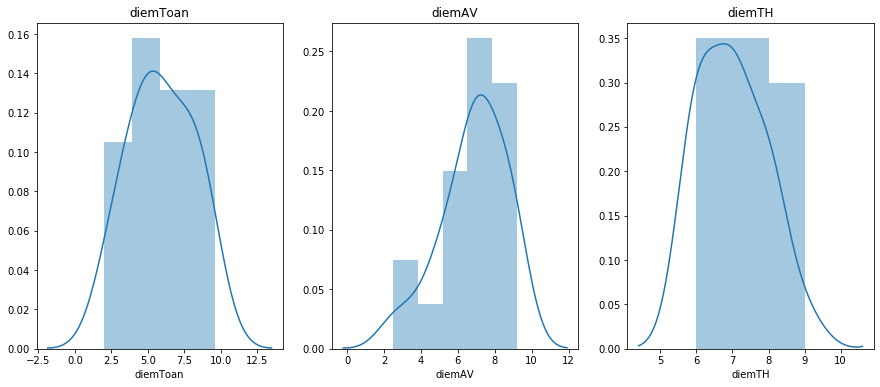

In [4]:
#1.1. Ve bieu do phan phoi tan suat diem thi cac mon
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.distplot(data["diemToan"])
plt.title("diemToan")
plt.subplot(1,3,2)
sns.distplot(data["diemAV"])
plt.title("diemAV")
plt.subplot(1,3,3)
sns.distplot(data["diemTH"])
plt.title("diemTH")
plt.show()

In [5]:
data.describe()

,stt,diemToan,diemAV,diemTH,IQ
count,20.00000,20.000000,20.00000,20.000000,20.000000
mean,10.50000,5.920000,6.86000,7.000000,115.200000
std,5.91608,2.214212,1.79338,0.917663,22.279563
min,1.00000,2.000000,2.50000,6.000000,68.000000
25%,5.75000,4.400000,6.07500,6.000000,109.250000
50%,10.50000,5.800000,7.10000,7.000000,120.000000
75%,15.25000,7.700000,8.17500,8.000000,134.250000
max,20.00000,9.600000,9.20000,9.000000,140.000000


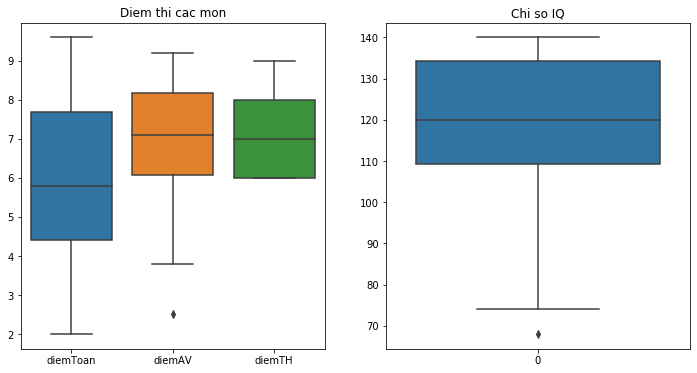

In [6]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(data=data[["diemToan","diemAV","diemTH"]])
plt.title("Diem thi cac mon")
plt.subplot(1,2,2)
sns.boxplot(data=data["IQ"])
plt.title("Chi so IQ")
plt.show()

Dựa vào những boxplot trên, ta thấy dữ liệu điểm Anh Văn và chỉ số IQ có outliers.

In [7]:
#tim outliers

In [8]:
diemAV_zscore = stats.zscore(data.diemAV)
print(diemAV_zscore)

[ 0.0800929  -0.26316237  0.53776659 -2.49432163 -1.75060188  0.19451132
  0.88102186 -0.03432553 -1.06409134  1.16706792  1.33869555 -0.83525449
  1.05264949  0.30892974  0.19451132  1.33869555 -0.32037159  0.70939422
 -0.94967291 -0.09153474]


In [9]:
outliers_AV = diemAV_zscore[[(n <= -2)| (n >= 2) for n in diemAV_zscore]]
indexes_AV = [diemAV_zscore.tolist().index(i) for i in outliers_AV]
indexes_AV

[3]

In [10]:
print("Outliers cua diemAV: \n", data.diemAV[indexes_AV])

Outliers cua diemAV: 
 3    2.5
Name: diemAV, dtype: float64


In [11]:
#tim outlier cua IQ

In [12]:
IQ_zscore = stats.zscore(data.IQ)
print(IQ_zscore)

[-2.17356944  1.00389436  0.91179396 -1.66701724 -0.37761164  0.58944256
  0.22104096 -1.89726824 -0.23946104  0.86574376  1.09599476 -0.23946104
  1.14204496 -0.00921004 -1.25256544  0.58944256  0.22104096 -0.10131044
  0.26709116  1.04994456]


In [13]:
outliers_IQ = IQ_zscore[[(n <= -2)| (n >= 2) for n in IQ_zscore]]
indexes_IQ = [IQ_zscore.tolist().index(i) for i in outliers_IQ]
indexes_IQ

[0]

In [14]:
print("Outliers cua IQ: \n", data.IQ[indexes_IQ])

Outliers cua IQ: 
 0    68
Name: IQ, dtype: int64


In [15]:
corr_Toan = np.corrcoef(data.diemToan,data.IQ)
corr_AV = np.corrcoef(data.diemAV,data.IQ)
corr_TH = np.corrcoef(data.diemTH,data.IQ)

In [16]:
corr_Toan

array([[1.        , 0.87241887],
       [0.87241887, 1.        ]])

In [17]:
corr_AV

array([[1.        , 0.47152203],
       [0.47152203, 1.        ]])

In [18]:
corr_TH

array([[1.        , 0.62297683],
       [0.62297683, 1.        ]])

Dựa trên correlation coefficient giữa các môn và chỉ số IQ, ta thấy điểm Toán có hệ số tương quan lớn nhất với chỉ số IQ. Do vậy, lựa chọn dữ liệu điểm Toán để dự đoán chỉ số IQ.

In [19]:
#du doan IQ bang hoi quy tuyen tinh

In [20]:
def gradient_descent_2(alpha, x,y, numIterations):
    m = x.shape[0]
    theta = np.ones(2)
    for iter in range(0, numIterations):
        hypothesis = np.dot(x,theta)
        loss = hypothesis - y
        J = np.sum(loss**2)/(2*m)
        print("iter %s | J: %.3f" %(iter,J))
        theta0_prime = np.sum(loss)/m
        theta1_prime = np.sum(loss * x[:,1])/m
        
        gradient = np.array([theta0_prime, theta1_prime])
        theta = theta - alpha*gradient
        
        if iter == 0:
            print("hypothesis", hypothesis)
            print("loss", loss)
            print("gradient", gradient)
            print("theta", theta)
    return theta

<Figure size 864x576 with 0 Axes>

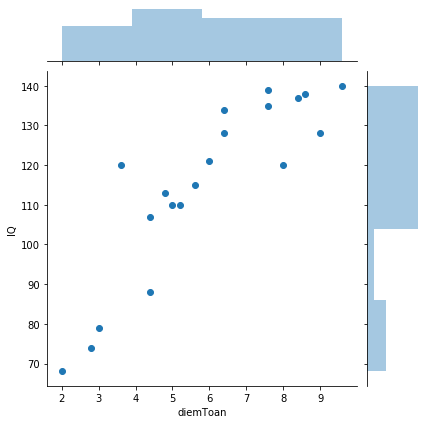

In [21]:
plt.figure(figsize=(12,8))
sns.jointplot(x=data.diemToan,y=data.IQ)
plt.show()

In [22]:
#tim y = mx + b
m = data.diemToan.size
X = np.c_[np.ones(m), data.diemToan]
y = data.IQ
alpha=0.01
theta = gradient_descent_2(alpha, X, y,1000)

iter 0 | J: 6059.502
hypothesis [ 3.   9.4  8.6  4.   5.4  7.4  9.   3.8  6.2  7.4  8.6  6.  10.6  6.6
  5.4 10.   4.6  5.8  7.   9.6]
loss 0     -65.0
1    -127.6
2    -126.4
3     -75.0
4    -101.6
5    -120.6
6    -111.0
7     -70.2
8    -103.8
9    -126.6
10   -130.4
11   -104.0
12   -129.4
13   -108.4
14    -82.6
15   -118.0
16   -115.4
17   -107.2
18   -114.0
19   -128.4
Name: IQ, dtype: float64
gradient [-108.28  -677.246]
theta [2.0828  7.77246]
iter 1 | J: 2310.170
iter 2 | J: 986.482
iter 3 | J: 518.960
iter 4 | J: 353.633
iter 5 | J: 294.971
iter 6 | J: 273.959
iter 7 | J: 266.237
iter 8 | J: 263.206
iter 9 | J: 261.831
iter 10 | J: 261.042
iter 11 | J: 260.461
iter 12 | J: 259.953
iter 13 | J: 259.472
iter 14 | J: 259.001
iter 15 | J: 258.534
iter 16 | J: 258.070
iter 17 | J: 257.607
iter 18 | J: 257.145
iter 19 | J: 256.685
iter 20 | J: 256.225
iter 21 | J: 255.767
iter 22 | J: 255.309
iter 23 | J: 254.853
iter 24 | J: 254.397
iter 25 | J: 253.943
iter 26 | J: 253.490
iter

In [23]:
X[:5]

array([[1. , 2. ],
       [1. , 8.4],
       [1. , 7.6],
       [1. , 3. ],
       [1. , 4.4]])

In [24]:
print("m = ", theta[1], "b = ", theta[0])

m =  11.611847919445205 b =  44.28350236491087


In [25]:
for i in range(X.shape[1]):
    IQ_predict = theta[1]*X + theta[0]

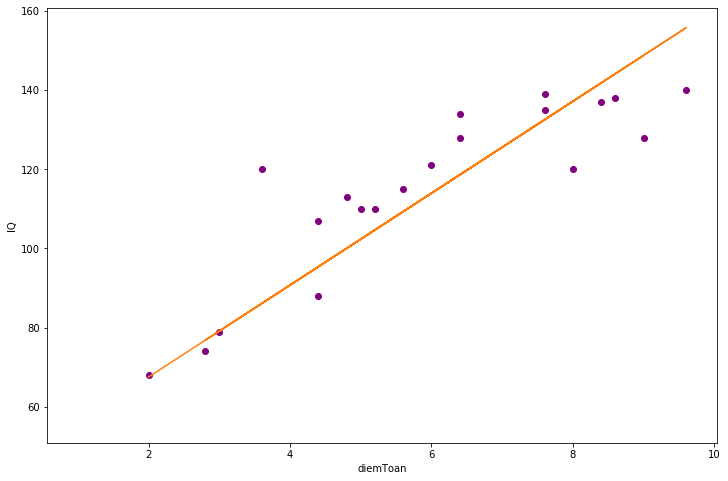

In [26]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,1], data.IQ,color="purple")
plt.plot(X,IQ_predict)
plt.xlabel("diemToan")
plt.ylabel("IQ")
plt.show()

In [27]:
#du doan cac IQ thuoc [2.0,5.0,8.0,9.5]
x_0 = np.array([2.0, 5.0, 8.0, 9.5])
for x in x_0:
    print("IQ dự đoán với điểm toán %.1f: " %x, theta[1]*x+theta[0])

IQ dự đoán với điểm toán 2.0:  67.50719820380128
IQ dự đoán với điểm toán 5.0:  102.3427419621369
IQ dự đoán với điểm toán 8.0:  137.1782857204725
IQ dự đoán với điểm toán 9.5:  154.59605759964032
